# 1  표본 분포 확인

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 자료 내려받고 DataFrame으로 저장
titanic_URL = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/titanic_processed.csv"
df_titanic = pd.read_csv(titanic_URL)

In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1300,0,3,female,14.5000,1,0,14.4542,C
1301,0,3,female,22.0000,1,0,14.4542,C
1302,0,3,male,26.5000,0,0,7.2250,C
1303,0,3,male,27.0000,0,0,7.2250,C


## 1.1  자료 정리

### 1.1.1  Dummy variables

In [4]:
df_titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

dummy variables: pclass, sex, embarked

더미변수는 범주형 변수를 연속형 변수"스럽게" 변환한 것

정성변수이자 범주형 변수의 특성을 띄는 pclass, sex, embarked를 더미변수로 변환

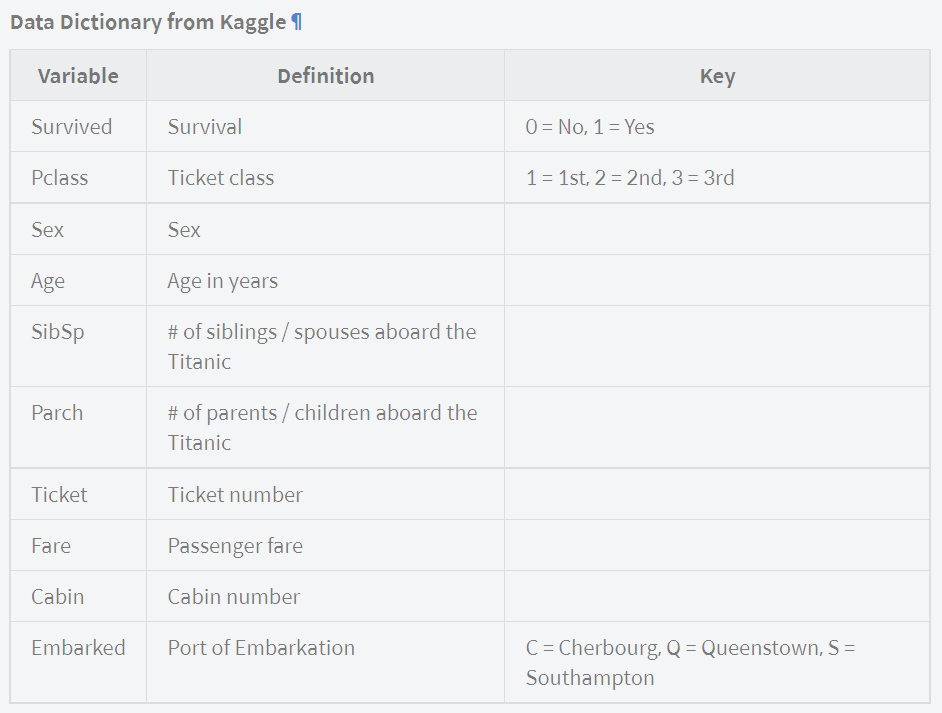

Pclass는 사회경제적 지위(1에 가까울 수록 높음, 1 = 1st, 2 = 2nd, 3 = 3rd)

SipSp는 배우자나 형제 자매 명 수의 총 합

Parch는 부모 자식 명 수의 총 합

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# dummy variables: pclass, sex, embarked
df_titanic = df_titanic.astype({'pclass':'object'})
df_titanic.dtypes

survived      int64
pclass       object
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [6]:
df_titanic_dum = pd.get_dummies(df_titanic, drop_first=True)

In [7]:
df_titanic_dum

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,0,0,0,0,1
1,1,0.9167,1,2,151.5500,0,0,1,0,1
2,0,2.0000,1,2,151.5500,0,0,0,0,1
3,0,30.0000,1,2,151.5500,0,0,1,0,1
4,0,25.0000,1,2,151.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1300,0,14.5000,1,0,14.4542,0,1,0,0,0
1301,0,22.0000,1,0,14.4542,0,1,0,0,0
1302,0,26.5000,0,0,7.2250,0,1,1,0,0
1303,0,27.0000,0,0,7.2250,0,1,1,0,0


feature로 사용할 변수: sex, age, pclass, fare

일단 생존 여부에 중요한 영향을 미쳤을 것으로 예상하는 값들만 추린다. sex, age, pclass, fare를 생각해보았다. 이에 여성, 어린이, 1/2/3등석, 지불운임 순으로 살아남을 확률이 높다고 가설을 세웠다.

### 1.1.2  로그변환

feature로 사용할 변수: sex, age, pclass, fare 중 fare 변수는 skewed되어 있고 분산이 크다.

또 fare의 경우 데이터 분포가 몰려 있기 때문에 분석 결과를 해칠 우려가 있다.

따라서 분포를 좀 더 정규분포의 형태로 바꿔주기 위해 log 변환을 시행하기로 결정하였다.

In [8]:
df_titanic_dum['fare'] = np.log(df_titanic_dum['fare'])
df_titanic_dum = df_titanic_dum.loc[:, ['survived', 'age', 'fare', 'pclass_2', 'pclass_3', 'sex_male']]
df_titanic_dum

,survived,age,fare,pclass_2,pclass_3,sex_male
0,1,29.0000,5.353456,0,0,0
1,1,0.9167,5.020916,0,0,1
2,0,2.0000,5.020916,0,0,0
3,0,30.0000,5.020916,0,0,1
4,0,25.0000,5.020916,0,0,0
...,...,...,...,...,...,...
1300,0,14.5000,2.670985,0,1,0
1301,0,22.0000,2.670985,0,1,0
1302,0,26.5000,1.977547,0,1,1
1303,0,27.0000,1.977547,0,1,1


## 1.2  다중공선성

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_titanic_dum.values, i) for i in range(df_titanic_dum.shape[1])]
vif["features"] = df_titanic_dum.columns
vif

,VIF Factor,features
0,2.242179,survived
1,5.716168,age
2,7.338102,fare
3,1.505565,pclass_2
4,2.139414,pclass_3
5,3.451994,sex_male


In [11]:
coef_list = []
features = []
col_len = df_titanic_dum.shape[1]
for i in range(col_len):
  for j in range(i+1, col_len):
    coef_list.append(np.corrcoef(df_titanic_dum.iloc[:,i], df_titanic_dum.iloc[:,j])[1,0])
    features.append('corrcoef between {} and {}'.format(df_titanic_dum.columns[i], df_titanic_dum.columns[j]))

In [12]:
coef = pd.DataFrame()
coef["correlation coefficient"] = coef_list
coef["features"] = features
coef

,correlation coefficient,features
0,-0.053346,corrcoef between survived and age
1,0.301394,corrcoef between survived and fare
2,0.051285,corrcoef between survived and pclass_2
3,-0.282371,corrcoef between survived and pclass_3
4,-0.528551,corrcoef between survived and sex_male
5,0.203231,corrcoef between age and fare
6,0.002500,corrcoef between age and pclass_2
7,-0.327320,corrcoef between age and pclass_3
8,0.063059,corrcoef between age and sex_male
9,-0.008890,corrcoef between fare and pclass_2


fare와 pclass_3의 correlation coefficient 값이 -0.636031 이다.

절댓값이 0.6 이상일 경우 feature에서 뺄 것을 고려해야 한다. 그러나 전체적으로 큰 차이가 보이지 않으므로 함께 고려하기로 결정하였다.

# 2  Classification

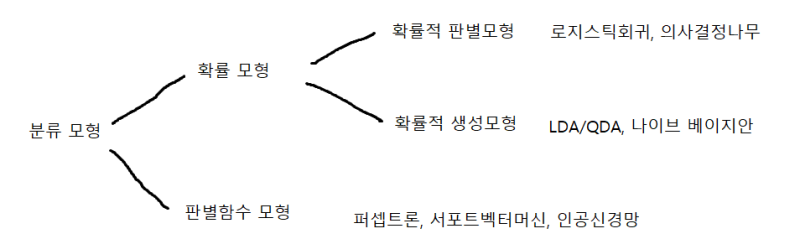

> 확률적 판별모형에 해당하는 로지스틱회귀, 의사결정나무 모형을 선택하고, 추가로 랜덤포레스트 모형을 선택하여 세 모형의 성과를 비교하고자 한다.

### (1) Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
#타겟 데이터 따로 저장
target = df_titanic_dum['survived']
input = df_titanic_dum.drop(labels=['survived'], axis=1)

In [15]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [16]:
input.head()

,age,fare,pclass_2,pclass_3,sex_male
0,29.0000,5.353456,0,0,0
1,0.9167,5.020916,0,0,1
2,2.0000,5.020916,0,0,0
3,30.0000,5.020916,0,0,1
4,25.0000,5.020916,0,0,0


In [17]:
#훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    input, target, test_size=0.2, random_state=42)

In [18]:
# 로지스틱 모델 학습
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과 반환
pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:, 1]

In [19]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred))
print('Precision : %.3f' % precision_score(y_test, pred))
print('Recall : %.3f' % recall_score(y_test, pred))
print('F1 : %.3f' % f1_score(y_test, pred))

Accuracy : 0.80
Precision : 0.744
Recall : 0.663
F1 : 0.701


In [20]:
# Confusion Matrix
conf_mat_logistic = confusion_matrix(y_true = y_test, y_pred = pred)
print(conf_mat_logistic)

[[148  21]
 [ 31  61]]


### (2) Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [22]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.2,random_state=42)

In [23]:
DT = DecisionTreeClassifier(max_depth=100)
model = DT.fit(X_train, y_train)
pred = model.predict(X_test)

In [24]:
print('Accuracy : %.2f' % accuracy_score(pred, y_test))
print('Precision : %.3f' % precision_score(pred, y_test))
print('Recall : %.3f' % recall_score(pred, y_test))
print('F1 : %.3f' % f1_score(pred, y_test))

Accuracy : 0.82
Precision : 0.707
Recall : 0.756
F1 : 0.730


In [25]:
# Confusion Matrix
conf_mat_tree = confusion_matrix(y_true = y_test, y_pred = pred)
print(conf_mat_tree)

[[148  21]
 [ 27  65]]


### (3) Random Forest

In [26]:
rf_clf = RandomForestClassifier()
model = rf_clf.fit(X_train, y_train)
pred = model.predict(X_test)

In [27]:
print('Accuracy : %.2f' % accuracy_score(pred, y_test))
print('Precision : %.3f' % precision_score(pred, y_test))
print('Recall : %.3f' % recall_score(pred, y_test))
print('F1 : %.3f' % f1_score(pred, y_test))

Accuracy : 0.83
Precision : 0.717
Recall : 0.786
F1 : 0.750


In [28]:
# Confusion Matrix
conf_mat_forest = confusion_matrix(y_true = y_test, y_pred = pred)
print(conf_mat_forest)

[[151  18]
 [ 26  66]]


# 3  모형 선택

Random Forest 모형을 선택하기로 결정하였다.

위 모형들에서 나타난 이진 분류결과표(Binary Confusion Matrix)를 해석한 것은 다음과 같다.

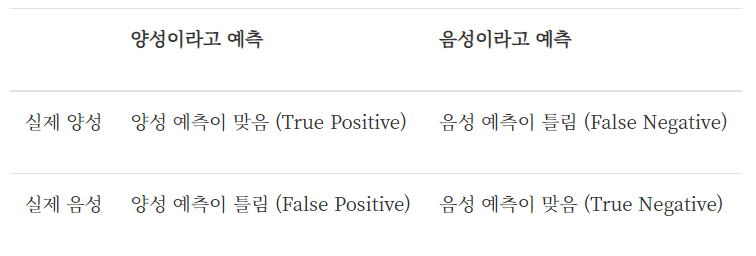

분류 모형의 예측 결과가 맞은 경우, 즉 양성을 양성이라고 예측하거나 음성을 음성이라고 예측한 경우에는 참(True)라고 하고 예측 결과가 틀린 경우, 즉 양성을 음성이라고 예측하거나 음성을 양성이라고 예측한 경우에는 거짓(False)이라고 한다.

즉 Confusion Matrix에 근거하였을 때 True Positive, True Negative의 값 모두 Random Forest 모형에서 가장 우수한 결과값이 도출되었다.

Confusion Matrix 뿐만 아니라 각종 Accuracy, Precision, Recall, F1 등 성능 평가 수치에서도 (차이가 크지는 않지만) 가장 우수한 결과를 보여주었다.



보험사에서 개인의 특성에 기초한 여행자보험상품을 제작하려 한다.

Titanic 분석 결과에 의거하였을 때, 보험사는 가장 예측 성능이 뛰어난 모형을 선택해야 한다.

여행자보험시장이 경쟁적이라면, 
위험을 가장 잘 예측하는 모형이라야 보험사의 손해율을 최소화할 수 있기 때문이다.

일반 상품은 제조 공정에서 사전에 제조 원가가 확정된다. 그러나 보험 상품의 원가인 지급 보험금은 사후에 확정되므로, 사전에 수리 통계적 방법을 이용하여 보험료를 책정해야 한다. 이 때 가격 변동 및 손해율 변동에 대해 정확하게 예측하는 것이 중요하다.

예측되는 손해율과 손해율의 변동성이 높을수록 최악의 상황을 가정하여 높은 보험금을 쌓아두어야 하므로, 보험사의 유동성이 감소하고 재무 부담이 증가한다.

따라서 보험사는 자신들이 설계할 여행자보험이 미래에 어떠한 손해율을 나타낼지 잘 예측해야만 한다.

다시 말해 우리가 Titanic 데이터를 기반으로 수행한 머신러닝 모형들 중에서 가장 성능이 뛰어난 모형을 선택해야 한다. 개인의 특성에 기초한 생존확률 예측 결과가 가장 뛰어난 모형을 선택하는 것이 보험의 손해율과 직결되는 일이기 때문이다.

따라서 보험사에서는 우리가 수행한 분류모형 중 가장 성능이 뛰어난 Random Forest 모형을 선택하는 것이 바람직하다고 볼 수 있다.

(To. 교수님, 조교님께)

'한 번에 한해 감점없이 지각 제출을 허용'한다는 조항에 의거하여,
이번 지각제출을 감점 없이 채점해주실 수 있으실까요? 앞으로는 늦지 않게 제출하도록 하겠습니다. 감사합니다